<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Assignments/DA_Assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Analyzing the average heights of NBA *Players*

In [2]:
df = pd.read_csv("players.csv")

In [3]:
df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,16,24,66.7,6,26,32,46,7,0,14,15,110,3.29,0.50,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,145,174,83.3,32,134,166,261,54,15,157,189,791,1.66,0.34,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,44,61,72.1,46,123,169,33,21,22,38,83,318,0.87,0.55,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,30,46,65.2,48,114,162,30,19,9,44,88,244,0.68,0.43,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,107,141,75.9,131,413,544,244,68,98,100,121,1530,2.44,0.68,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [4]:
df.shape

(490, 34)

#### Hypothesis Testing

One Sample Significance Test for Mean is extremely similar to that for Proportion. We will go through almost an identical process.

The hypotheses are defined as follows:
* **Null Hypothesis**: The average height of an NBA player is 200.66 cm.
* **Alternate Hypothesis**: The average height of an NBA player is not 200.66 cm.

Significance Level, $\alpha$ is at 0.05. Assuming Null Hypothesis to be true.

In [5]:
population_mean = 200.66

In [6]:
sample_mean = df["Height"].dropna().mean()
sample_mean

197.44075829383885

In [7]:
sigma = df["Height"].dropna().std()/np.sqrt(len(df.dropna())-1)

In [8]:
from scipy import stats

In [9]:
z = (sample_mean-population_mean)/sigma

In [10]:
p_val=(1-stats.norm.cdf(np.abs(z)))*2

In [11]:
p_val

5.949463144361289e-12

The p value obtained is much lesser than the significance level $\alpha$. We therefore reject the null hypothesis and accept the alternate hypothesis (the negation). We can therefore arrive at the following conclusion from this analysis:

**The average height of NBA Players is NOT 6'7"**.

## Using Standard Libraries

In [12]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
sm.stats.ztest(df["Height"].dropna(),value=population_mean)

(-7.566341847897391, 3.838810356044806e-14)

# Analyzing DEPRESSION in India by Gender

Are men as likely to commit suicide as women?

This is the question we will attempt at answering in this section. To answer this question, we will use suicide statistics shared by the National Crime Records Bureau (NCRB), Govt of India. To perform this analysis, we need to know the sex ratio in India. The Census 2011 report states that there are 940 females for every 1000 males in India.

Let p denote the fraction of women in India.

###H0:MEN AND WOMEN  ARE EQUALLY LIKELY TO DEPRESS    (NULL)
### H1:MEN AND WOMEN  ARE  NOT EQUALLY LIKELY TO DEPRESS  (ALTERNATE)


In [14]:
proportion_female=940/(940+1000)

In [15]:
proportion_male=1-proportion_female

In [18]:
df=pd.read_excel("Suicides.xlsx")
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


####  Decide on the Statsitical Test

We will be using the Two Sample Z-Test Proportion test here. 


In [19]:
sample_female_proportion = df['Gender'].value_counts()['Female']/len(df)

In [20]:
sigma = np.sqrt((proportion_female*proportion_male)/len(df))

In [21]:
z_val=(sample_female_proportion-proportion_female)/sigma

In [22]:
z_val

14.589546580591277

In [24]:
p_val=(1-stats.norm.cdf(np.abs(z_val)))*2

In [23]:
p_val

5.949463144361289e-12

Depression Rate is not same for men and women

## Using Standard Libraries

In [25]:
sm.stats.proportions_ztest(sample_female_proportion,nobs=len(df),value=proportion_female)

(-162838.33779698968, 0.0)

# Analyzing Literacy Rates

Two Sample test

In [26]:
df=pd.read_csv("cities.csv")
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [27]:
punjab = df[df['state_name'] == 'PUNJAB']['effective_literacy_rate_total'].dropna()
delhi = df[df['state_name'] == 'NCT OF DELHI']['effective_literacy_rate_total'].dropna()

In [28]:
punjab_mean = punjab.mean()
punjab_std = punjab.std()

punjab_mean, punjab_std

(83.44062499999998, 5.381935796408821)

In [29]:
delhi_mean = delhi.mean()
delhi_std = delhi.std()

delhi_mean, delhi_std

(83.658, 4.6569551671206195)

From the above calculations, it can be seen that the mean and the standard deviations of Punjab and Delhi literacy rates differ slightly. The next step is to determine if this difference is a statistically significant one.

For hypothesis testing, the following are defined:

* **Null Hypothesis:** The true mean literacy rate for Punjab and Delhi are the same.
* **Alternate Hypothesis:** The true mean literacy rate for Punjab and Delhi are not the same.

The threshold value of $\alpha$ is assumed to be 0.05.
Assuming Null Hypothesis is true.

In [30]:
mean_diff=punjab_mean-delhi_mean
sigma=np.sqrt((delhi_std**2)/len(delhi)  + (punjab_std**2)/len(punjab))
mean_diff, sigma

(-0.2173750000000183, 1.8044784525904138)

In [31]:
z = (mean_diff) / sigma
z

-0.12046417051307332

In [32]:
p = (1-stats.norm.cdf(z))*2
p

1.095884539297947

The value of p obtained here is much higher than the significance level $\alpha$. Therefore, we cannot reject the null hypothesis. It stands.

**The true mean literacy rate for Punjab and Delhi are the same.**

Since we are dealing with sample sizes less than 30, using the t-statistic will be more appropriate. To use student's t though, we need to calculate the degree of freedom. This is done as follows:

In [33]:
deg = (((delhi_std**2)/len(delhi)  + (punjab_std**2)/len(punjab)) ** 2) / ((((delhi_std**2)/len(delhi))**2)/(len(delhi)-1)  + (((punjab_std**2)/len(punjab))**2)/(len(punjab) - 1))
deg

28.82681788840003

In [34]:
z = (mean_diff ) / sigma
z

-0.12046417051307332

In [35]:
p = (1-stats.t.cdf(z, deg))*2
p

1.0950488195491228

#Using Standard Libraries

In [36]:
sm.stats.ztest(punjab.dropna(), delhi.dropna(),alternative='two-sided')

(-0.1198880354206678, 0.9045718424630748)

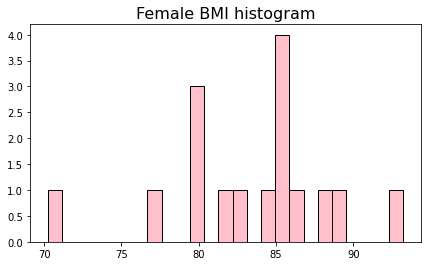

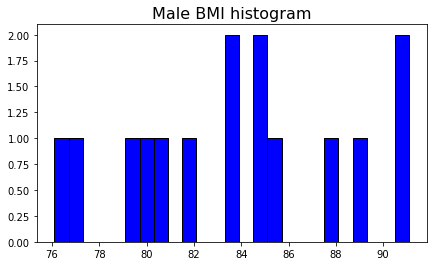

In [37]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(punjab.dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(delhi.dropna(),edgecolor='k',color='blue',bins=25)
plt.show()